# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
RANDOM_SEED = 42

In [3]:
df = pd.read_csv('main_task (1).csv')


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


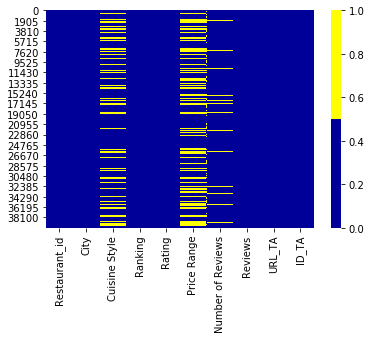

In [5]:
cols = df.columns[0:10]#  
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))




In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Restaurant_id - 0.0%
City - 0.0%
Cuisine Style - 23.0%
Ranking - 0.0%
Rating - 0.0%
Price Range - 35.0%
Number of Reviews - 6.0%
Reviews - 0.0%
URL_TA - 0.0%
ID_TA - 0.0%


In [7]:
one_value_cols = [col for col in df.columns if df[col].nunique() <= 1]
print(f'Всего в датасете {len(one_value_cols)} столбцов с одним уникальным значением.')
# проверим есть ли колонки с одним уникальным значением (делаем для того, чтобы исключить колонку потому, 
# что она не будет влиять на целевую переменную)

Всего в датасете 0 столбцов с одним уникальным значением.


Теперь попробуем выявить малоинформативные данные. Если признак имеет слишком много строк с одинаковыми значениями, он не несет полезной информации для проекта.

In [8]:
num_rows = len(df.index)
low_information_cols = [] #
for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Таких признаков у нас не имеется

Просмотрим все колонки подряд

In [9]:
# нам пригодится функция для построения боксплотов, с помощью визуализации попробуем 
# определить какие данные нам пригодятся а какие будут неинформативными
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='Rating', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [10]:
df['City'].value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

In [11]:
len(df['City'].value_counts())

31

Как видно у нас данные из 31 города. Довольно много для pd.get_dummies(df, columns=[ 'City',], dummy_na=True)

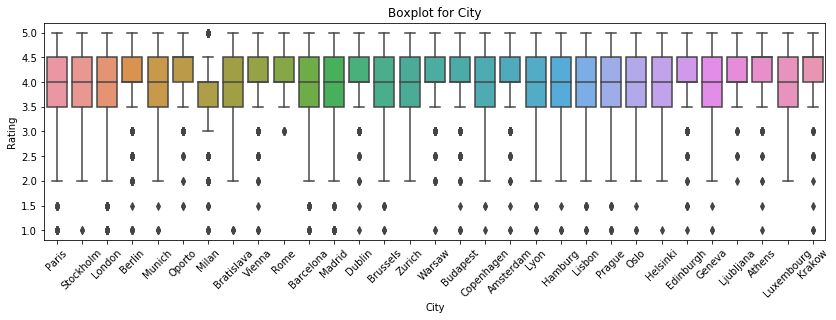

In [12]:
for col in ['City']:
    get_boxplot(col)

С помощью графика стало очевидно, что в зависимости от города целевая переменная практически не меняется... Возможно имеет смысл ввести другой признак... 

Предположительно, уровень жизни в городе взаимосвязан с уровнем развития отрасли общественного питания.

In [13]:
life_dict = {'Paris' :15 ,'Madrid' :19, 'Barcelona' : 17,'Berlin' :7 ,'Milan' :21 ,'Rome' : 22,'Vienna' : 1,'Amsterdam' :12 ,'Brussels' :13 ,'Hamburg' : 5,'Munich' :14 ,'Lyon' :16 ,'Stockholm' : 10,'Budapest' :23 ,'Dublin' :20 ,'Copenhagen' :8 ,'Zurich' :3 ,'Geneva' :4 ,'Oslo' : 9,'Helsinki' : 2,'Luxembourg' :11 , 'London':0 ,'Prague':0 ,'Lisbon':0,'Warsaw':0 ,'Athens':0 ,'Edinburgh': 0,'Oporto':0 ,'Krakow': 0,'Bratislava':0 ,'Ljubljana': 0}
# источник информации по распределению городов https://ru.ihodl.com/lifestyle/2015-08-23/top-luchshikh-evropeiskikh-gorodov/
# наверное не самый надежный и авторитетный (точнее хуже не найдешь) и информация устаревшая, но времени на поиски особо не было...
# значение = место в рейтинге.

In [14]:
df['rating_cities'] = df['City'].map(life_dict)

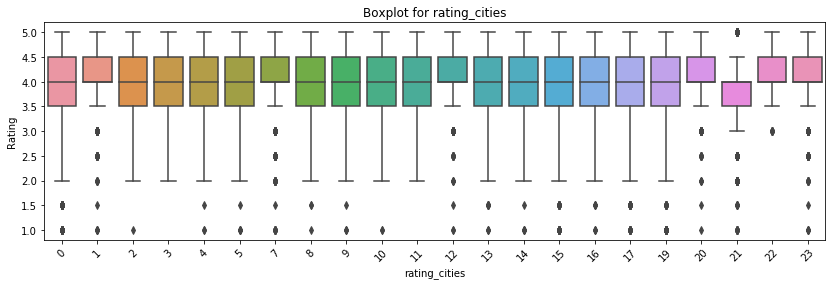

In [15]:
for col in ['rating_cities']:
    get_boxplot(col)

Показатель МАЕ улучшился до 0.386! 

Судя по всему, количество вхождений городов может зависеть от:
1.количества ресторанов; 
2.количества жителей.

Попробуем ввести новый признак - частота вхождений города.

In [16]:
freq = df["City"].value_counts(normalize = True)
df["City_freq"] = df["City"].map(freq)
df[["City", "City_freq"]].head(6)

,City,City_freq
0,Paris,0.122425
1,Stockholm,0.020500
2,London,0.143925
3,Berlin,0.053875
4,Munich,0.022325
5,Oporto,0.012825


Показатель МАЕ улучшился до 0.216!

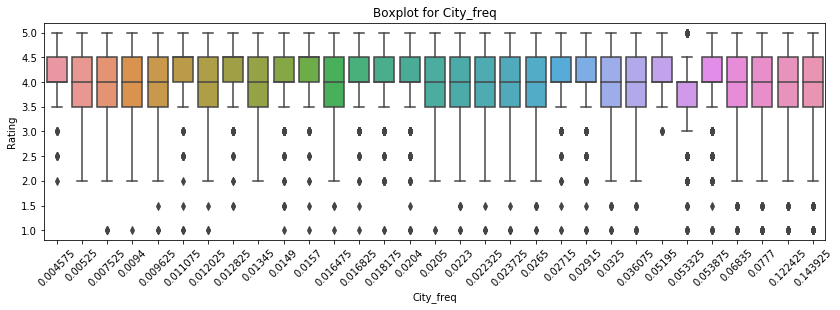

In [17]:
for col in ['City_freq']:
    get_boxplot(col)

Теперь попробуем классифицировать города по количеству жителей (млн. человек)

In [18]:
citizen_dict = {'Paris' :2.2 ,'Madrid' :3.3, 'Barcelona' : 1.6,'Berlin' :3.5 ,'Milan' :1.3 ,'Rome' : 2.9,'Vienna' : 1.8,'Amsterdam' :2.4 ,'Brussels' :0.2 ,'Hamburg' : 1.8,'Munich' :1.4 ,'Lyon' :0.5 ,'Stockholm' : 0.9,'Budapest' :1.8 ,'Dublin' :1.2 ,'Copenhagen' :0.6 ,'Zurich' :0.4 ,'Geneva' :0.2 ,'Oslo' : 0.7,'Helsinki' : 0.6,'Luxembourg' :0.6 , 'London':8.2 ,'Prague':1.3 ,'Lisbon':0.6,'Warsaw':1.8 ,'Athens':3.2 ,'Edinburgh': 0.5,'Oporto':0.2 ,'Krakow': 0.8,'Bratislava':0.4 ,'Ljubljana': 0.3}

In [19]:
df['citizens'] = df['City'].map(citizen_dict)
df['citizens'] = df.citizens

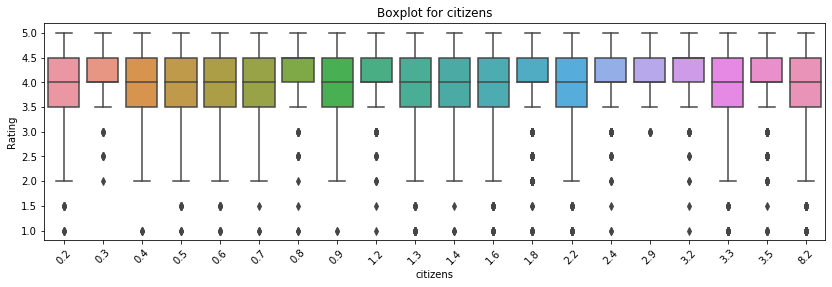

In [20]:
for col in ['citizens']:
    get_boxplot(col)

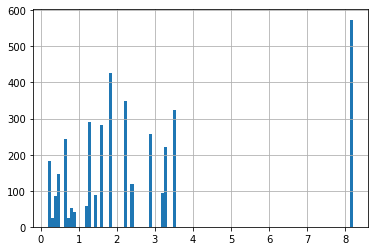

In [21]:
df['citizens'][df['Rating'] == 5].hist(bins=100)

Показатель МАЕ улучшился до 0.215. Улучшение показателя незначительно. Возможно нужно применить агрегированный показатель - количество ресторанов на 100 тыс. жителей.

In [22]:
a = pd.DataFrame(df.groupby('City')['Restaurant_id'].nunique()).reset_index() 
a['citizens'] = a['City'].map(citizen_dict)

In [23]:
a['citizens'] =a['citizens']*10 

In [24]:
a['competition'] = (a['Restaurant_id']/a['citizens']).round(2)


In [25]:
competition_dict = {'Amsterdam': 45.25, 'Athens': 19.62, 'Barcelona': 170.88, 'Berlin': 61.57, 'Bratislava': 75.25, 'Brussels': 530.00, 'Budapest': 45.33, 'Copenhagen':109.83,'Dublin': 56.08, 'Edinburgh':119.20, 'Geneva':240.50, 'Hamburg': 52.72,'Helsinki':62.67, 'Krakow':55.38, 'Lisbon':216.67,'Ljubljana':61.00, 'London':70.21, 'Luxembourg':35.00, 'Lyon':178.40, 'Madrid':94.18,'Milan':164.08, 'Munich':63.79, 'Oporto':256.50,'Oslo': 55.00,'Paris':222.59, 'Prague': 111.00, 'Rome': 71.66, 'Stockholm': 91.11, 'Vienna':64.78, 'Warsaw': 40.39,'Zurich':134.50}

In [26]:
df['competition'] = df['City'].map(competition_dict)

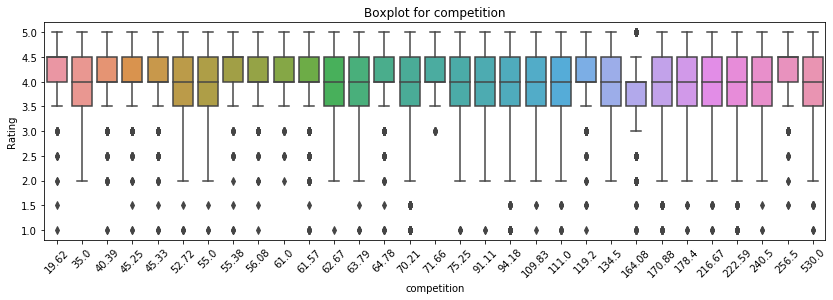

In [27]:
for col in ['competition']:
    get_boxplot(col)

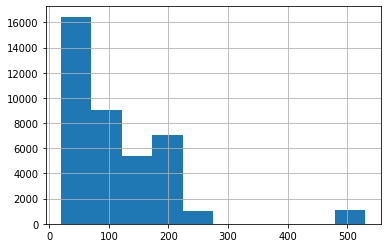

In [28]:
df['competition'].hist()

Как-то все очень странно... Логика была в том, что при большей конкуренции (при большем количестве ресторанов в расчете на 100 тыс. человек) оценка будет выше, а исходя из данных представленных на рисунке получается, что более высокие оценки у ресторанов находящихся в менее конкурентной среде. Возможно необходимо рассматривать данный показатель во взаимосвязи с ценовой категорией.

In [29]:
df['Price Range'].value_counts(dropna = False)

$$ - $$$    18412
NaN         13886
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [30]:
df['Price Range'] = df['Price Range'].fillna('$$ - $$$')

In [31]:
price_dict = {'$': 3, '$$ - $$$':2, '$$$$':1}

In [32]:
df['Price Range'] = df['Price Range'].map(price_dict)

In [33]:
df['competition3'] = df[(df['Price Range'] == 3)]['competition']

In [34]:
df['competition2'] = df[(df['Price Range'] == 2)]['competition']

In [35]:
df['competition1'] = df[(df['Price Range'] == 1)]['competition']

In [36]:
df = pd.get_dummies(df, columns=[ 'Price Range',], dummy_na=False)

Пока плохо понятно что нам это дает)

Создадим признаки в привязке к ценовому сегменту

In [37]:
df['competition3']= df['competition3'].fillna(0)

In [38]:
df['competition2']= df['competition2'].fillna(0)

In [39]:
df['competition1']= df['competition1'].fillna(0)

Попробуем поработать с отзывами. Предположим, что если в отзыве содержаться слова положительно характеризующие что-либо (обслуживание, кухню и т.д.) то и оценка будет более высокой. Поэтому присвоим таким отзывам значения 1, в противном случае значение 0. 

In [40]:
# df['Reviews'] = df['Reviews'].str.lower() # переведем все в строчные буквы

In [41]:
#review_list = ['good' , 'excellent' ,'nice' ,'not bad' ,'great' ,'super' ,'lovely' ,'heavenly' ,'like' ,'brilliant' ,'amazing' ,'tasty' ,'cheap' ,'fresh' ,'delicious' ,'best' ,'relaxing' ,'enjoy' ,'perfect','wonderful' , 'incredible','enjoyable','fabulous','awesome','cosy','beautiful','superb']
#len(review_list)
# создаем список ключевых слов. Я сделал небольшой, можно было бы его увеличить, но времени не хватает( 

In [42]:
#for i in df['Reviews']:
#    if review_list[0] in str(i) or review_list[1] in str(i) or review_list[2] in str(i) or review_list[3] in str(i) or review_list[4] in str(i) or review_list[5] in str(i) or review_list[6] in str(i) or review_list[7] in str(i) or review_list[8] in str(i) or review_list[9] in str(i) or review_list[10] in str(i) or review_list[11] in str(i) or review_list[12] in str(i) or review_list[13] in str(i) or review_list[14] in str(i) or review_list[15] in str(i) or review_list[16] in str(i) or review_list[17] in str(i) or review_list[18] in str(i) or review_list[19] in str(i) or review_list[20] in str(i) or review_list[21] in str(i) or review_list[22] in str(i) or review_list[23] in str(i) or review_list[24] in str(i) or review_list[25] in str(i) or review_list[26] in str(i):
#        df['Reviews'].replace(i, 1, inplace=True)
#    else:
#        df['Reviews'].replace(i, 0, inplace=True)
# заменяем. Очень долгая конструкция, но как получилось)

In [43]:
#df['Reviews'].value_counts()

In [44]:
#df['Rating'].median()

Еще и попал только в 6,4 тыс. отзывов, хотя оценки в основном около 4...

In [45]:
#for col in ['Reviews']:
#    get_boxplot(col)

Зато если попал то оценка выше 4, значит действовал правильно, но не доработал))

Сделаем проще - предположим, что есть зависимость длинны отзыва и оценки. Предположительно отрицательный будет длиннее.

In [46]:
reviews_list = []
for i in df['Reviews']:
    reviews_list.append (len(str(i).split()))
df['count_review_words'] = reviews_list

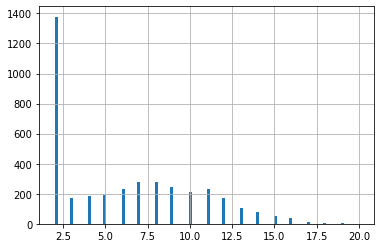

In [47]:
df['count_review_words'][df['Rating'] == 5].hist(bins=100)

Судя по всему так и есть! Больше всего отзывов с соответствующей им оценкой 5 состоит из 2 элементов (при том, что там еще и дата хранится). 

In [48]:
# Вытащим дату из данных
def fix_Reviews(x):
    if x == '[[], []]':
        return []
    else:
        x = x.replace(']]', '')
        x = x.replace("'", '')
        x = x.split('], [')[1]
        x = x.split(', ')
        return x
df['Dates of Reviews'] = df['Reviews'].apply(fix_Reviews)
df[['Date_1', 'Date_2']] = pd.DataFrame(df['Dates of Reviews'].tolist())
df['Date_1'] = pd.to_datetime(df['Date_1']).dt.date
df['Date_2'] = pd.to_datetime(df['Date_2']).dt.date
df['Timedelta'] = df['Date_1'] - df['Date_2']

In [49]:
# заменим данные в столбцах
for i in df['Date_1']:
    df['Date_1'] = i.weekday()
for i in df['Date_2']:
    df['Date_2'] = i.weekday()

In [50]:
df['Timedelta'] = pd.to_numeric(df['Timedelta'].dt.days, downcast='integer')

In [51]:
df['Timedelta'] = df['Timedelta'].fillna(df['Timedelta'].median())

Посмотрим на столбец Cuisine Style

In [52]:
df['Cuisine Style'].value_counts()

['Italian']                                                                                                                                              1032
['French']                                                                                                                                                805
['Spanish']                                                                                                                                               695
['French', 'European']                                                                                                                                    405
['Cafe']                                                                                                                                                  403
                                                                                                                                                         ... 
['European', 'Eastern European', 'Central European',

Просмотр телепередачи "На ножах" по увнвлц Пятница подсказывает, что чем больше видов блюд готовит ресторан тем ниже их качество. Протестируем эту гипотезу

In [53]:
x = []
for i in df['Cuisine Style']:
    x.append (len(str(i).split()))
df['count_cuisine'] = x

In [54]:
df['count_cuisine'] = df['count_cuisine'].fillna(df['count_cuisine'].median())

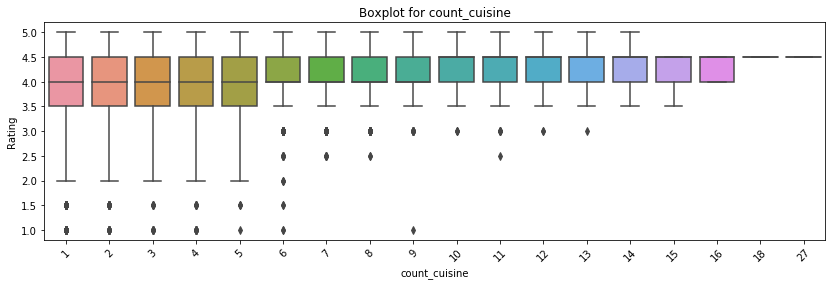

In [55]:
for col in ['count_cuisine']:
    get_boxplot(col)

К сожалению, судя по всему опыт Константина Ивлева работает только для России... Получается, что чем больше ассортимент - тем больше оценка ресторана.

Посмотрим на df['Ranking']

In [56]:
df['Ranking'].value_counts()

1080.0     19
437.0      18
491.0      18
345.0      18
431.0      18
           ..
14711.0     1
9409.0      1
14109.0     1
10501.0     1
5699.0      1
Name: Ranking, Length: 11936, dtype: int64

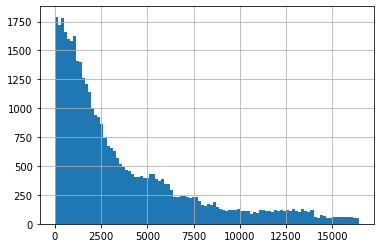

In [57]:
df['Ranking'].hist(bins=100)

In [58]:
# определение границ выбросов
median = df.Ranking.median()
IQR = df.Ranking.quantile(0.75) - df.Ranking.quantile(0.25)
perc25 = df.Ranking.quantile(0.25)
perc75 = df.Ranking.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 973.0, 75-й перцентиль: 5260.0, IQR: 4287.0,  Границы выбросов: [-5457.5, 11690.5].


In [59]:
df[(df['Ranking']> 11690.5)] = df['Ranking'].median() # удалим выбросы   

In [60]:
# попробуем нормализовать
normalize_ranking = []
for i in df['Ranking']:
    normalize_ranking.append((i - df['Ranking'].min())/(df['Ranking'].max()-df['Ranking'].min()))

In [61]:
df['Ranking'] = normalize_ranking

Посмотрим на Number of Reviews

In [62]:
df['Number of Reviews']= df['Number of Reviews'].fillna(0)

In [63]:
df['Number of Reviews'].value_counts()

2285.0    2450
0.0       2291
2.0       1693
3.0       1438
4.0       1232
          ... 
1907.0       1
784.0        1
1159.0       1
1429.0       1
1383.0       1
Name: Number of Reviews, Length: 1460, dtype: int64

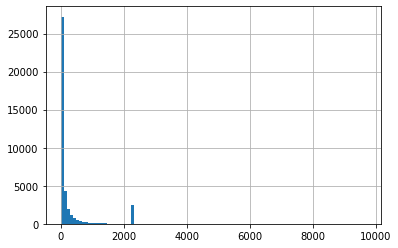

In [64]:
df['Number of Reviews'].hist(bins=100)

In [65]:
# определение границ выбросов
median = df['Number of Reviews'].median()
IQR = df['Number of Reviews'].quantile(0.75) - df['Number of Reviews'].quantile(0.25)
perc25 = df['Number of Reviews'].quantile(0.25)
perc75 = df['Number of Reviews'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 8.0, 75-й перцентиль: 149.0, IQR: 141.0,  Границы выбросов: [-203.5, 360.5].


In [66]:
df[(df['Number of Reviews']> 393.5)] = df['Number of Reviews'].median() # удалим выбросы   

In [67]:
b = []
for i in df['Number of Reviews']:
    b.append((i - df['Number of Reviews'].min())/(df['Number of Reviews'].max()-df['Number of Reviews'].min()))

In [68]:
# нормализуем
df['Number of Reviews'] = b


Корреляция данных

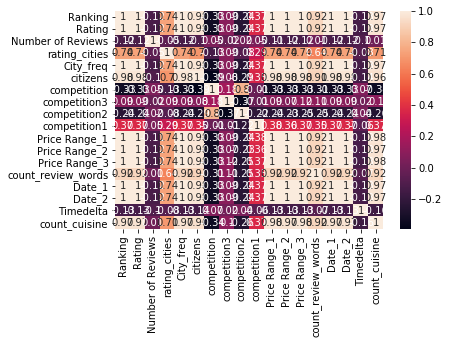

In [69]:
sns.heatmap(df.corr().round(2), annot = True)
# тепловая карта по результатам корреляцонного анализа

С учетом количества добавленных признаков плохо видно... Но прогоня несколько раз и варьируя набор признаков пришел к выводу, что необходимо выкинуть следующее:

In [70]:
df.drop(['Restaurant_id', 'Cuisine Style', 'URL_TA', 'ID_TA', 'Reviews', "Dates of Reviews", 'City', 'Price Range_1', 'competition1', 'competition3','competition2', 'competition', 'Price Range_2', 'Price Range_3'], axis='columns', inplace=True)

Конкуренция вообще не помогла((

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [71]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating'], axis = 1)
y = df['Rating']

In [72]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [73]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [74]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [75]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

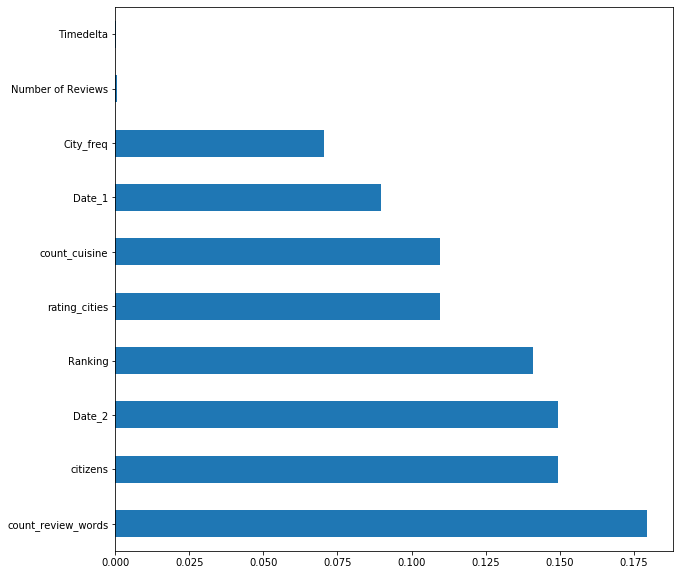

In [76]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [77]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.181177
